Importing the local dataset from Lyon we have

In [54]:
# command line
url='https://data.berkeleyearth.org/auto/Local/TAVG/Text/45.81N-5.77E-TAVG-Trend.txt'
!curl $url >45.81N-5.77E-TAVG-Trend.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  322k  100  322k    0     0  1091k      0 --:--:-- --:--:-- --:--:-- 1093k


 We will use the python script for importing and formatting the data file into a time series as follow

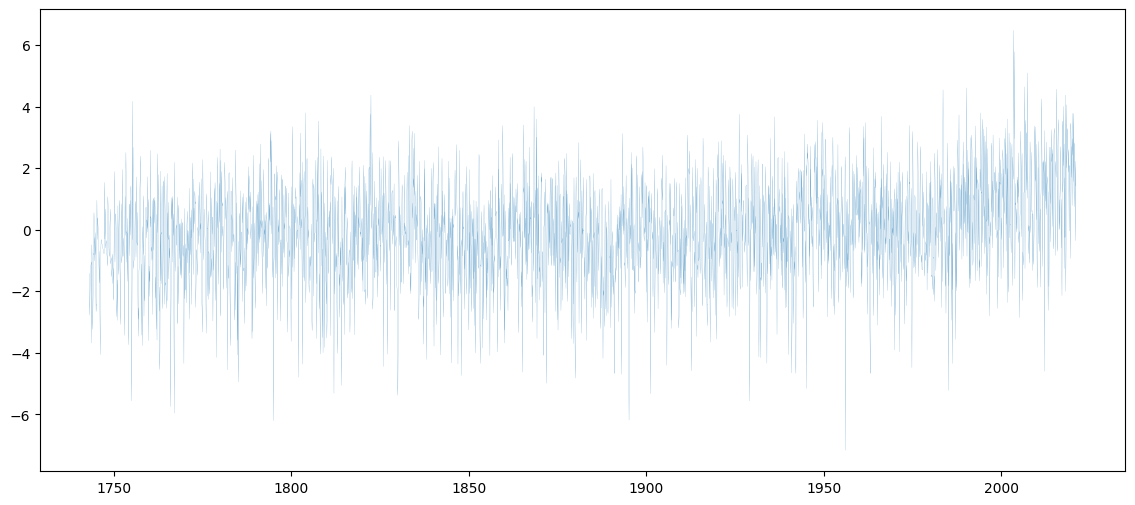

In [55]:
# python script
import numpy as np
import matplotlib.pyplot as plt
import csv
data_file = "45.81N-5.77E-TAVG-Trend.txt"
# initialize lists
year = []
month = []
anomaly = []
# import data from txt file
with open(data_file, 'r', encoding = 'latin1') as f:
  reader = csv.reader(f)
  for line in reader:
    lin = line[0].split()
    if len(lin) == 12 and lin[0] != "%": # skip non-data lines
      year.append(float(lin[0]))
      month.append(float(lin[1]))
      anomaly.append(float(lin[2]))
# convert to numpy array
year = np.array(year)
month = np.array(month)
anomaly = np.array(anomaly)
date = year + (month-0.5)/12.0 # convert date to decimal year
# print(anomaly[np.isnan(anomaly)]) #This part return us the list with all the nan that exists
#We will do an linear interpolation for the missing values in the anomaly
anomaly[np.isnan(anomaly)] = np.interp(np.flatnonzero(np.isnan(anomaly)), #Nan positions
                                       np.flatnonzero(~np.isnan(anomaly)), #Non Nan positions
                                       anomaly[~np.isnan(anomaly)]) #Values in the not Nan positions
# print(anomaly[np.isnan(anomaly)]) #We should see the list empty*
plt.figure(figsize=(14,6))
plt.plot(date,anomaly,linewidth=0.1)
plt.show()

Using linear regression to fit four models: constant, linear, quadratic or cubic polynomial to the time series, assuming $y_t$ to be Gaussian and independently distributed in time.

In [56]:
from numpy.polynomial import Polynomial
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

grades=[0,1,2,3,4,5,6]
MSE_errors = []
R2_errors = []

for deg in grades:
    p = Polynomial.fit(date, anomaly, deg)
    x_t = p(date)
    mse = mean_squared_error(anomaly, x_t)
    r2 = r2_score(anomaly, x_t)
    MSE_errors.append(mse)
    R2_errors.append(r2)
    print(f"Grado {deg}: MSE = {mse:.5f}: R2 = {r2:.5f}")
#For the logarithm fitness
X_log = np.log(date).reshape(-1, 1)
model_log = LinearRegression().fit(X_log, anomaly)
x_log = model_log.predict(X_log)
mse = mean_squared_error(anomaly, x_log)
r2 = r2_score(anomaly, x_log)
MSE_errors.append(mse)
R2_errors.append(r2)
print(f"Log: MSE = {mse:.5f}: R2 = {r2:.5f}")
#For the logarithm combined fitness
X_comb = np.column_stack([date, date**2, np.log(date)])
model_comb = LinearRegression().fit(X_comb, anomaly)
x_comb = model_comb.predict(X_comb)
mse = mean_squared_error(anomaly, x_comb)
r2 = r2_score(anomaly, x_comb)
MSE_errors.append(mse)
R2_errors.append(r2)
print(f"Logaritmic Combinbation: MSE = {mse:.5f}: R2 = {r2:.5f}")

t = date
omega = 2 * np.pi * (1)

# Contruction of the sinusoidal model
X_seasonal = np.column_stack([
    np.sin(omega * t),
    np.cos(omega * t),
    t,  # To see the linear tendency
    t**2,  # To see the cuadratic tendency
    t**3,  # To see the cubic tendency
])

model_seasonal = LinearRegression().fit(X_seasonal, anomaly)
x_seasonal = model_seasonal.predict(X_seasonal)
mse = mean_squared_error(anomaly, x_seasonal)
r2 = r2_score(anomaly, x_seasonal)
MSE_errors.append(mse)
R2_errors.append(r2)
print(f"Sinusoidal combination: MSE = {mse:.5f}: R2 = {r2:.5f}")

Grado 0: MSE = 2.62554: R2 = 0.00000
Grado 1: MSE = 2.47950: R2 = 0.05562
Grado 2: MSE = 2.43103: R2 = 0.07408
Grado 3: MSE = 2.39545: R2 = 0.08764
Grado 4: MSE = 2.39536: R2 = 0.08767
Grado 5: MSE = 2.38934: R2 = 0.08996
Grado 6: MSE = 2.38635: R2 = 0.09110
Log: MSE = 2.48267: R2 = 0.05441
Logaritmic Combinbation: MSE = 2.39536: R2 = 0.08767
Sinusoidal combination: MSE = 2.30519: R2 = 0.12201


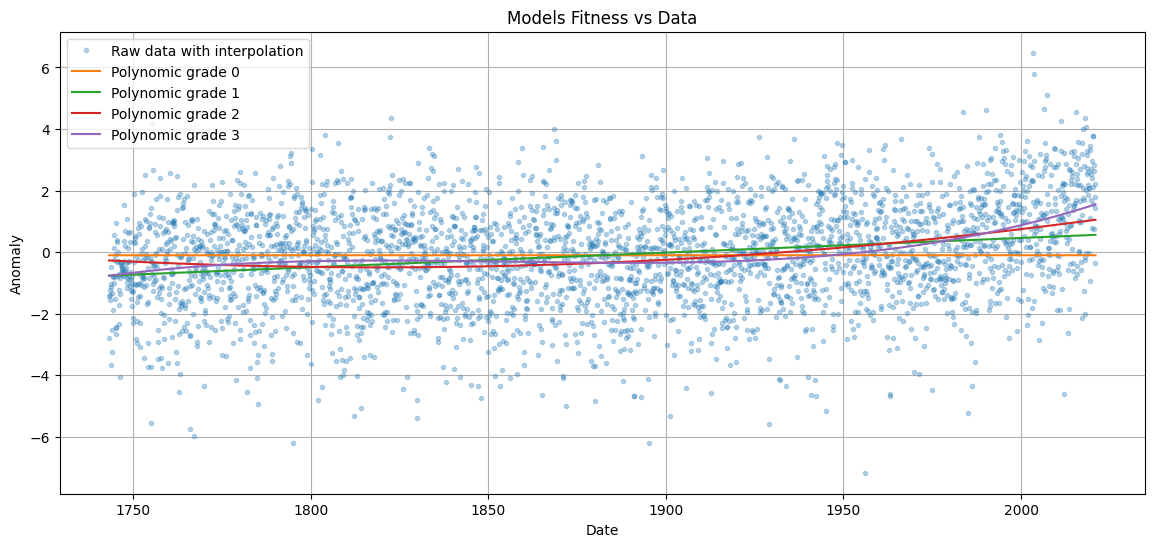

In [57]:
plt.figure(figsize=(14,6))
plt.plot(date, anomaly, '.', alpha=0.3, label='Raw data with interpolation')
plt.plot(date, Polynomial.fit(date, anomaly, 0)(date), label='Polynomic grade 0')
plt.plot(date, Polynomial.fit(date, anomaly, 1)(date), label='Polynomic grade 1')
plt.plot(date, Polynomial.fit(date, anomaly, 2)(date), label='Polynomic grade 2')
plt.plot(date, Polynomial.fit(date, anomaly, 3)(date), label='Polynomic grade 3')
plt.xlabel("Date")
plt.ylabel("Anomaly")
plt.title("Models Fitness vs Data")
plt.legend()
plt.grid(True)
plt.show()

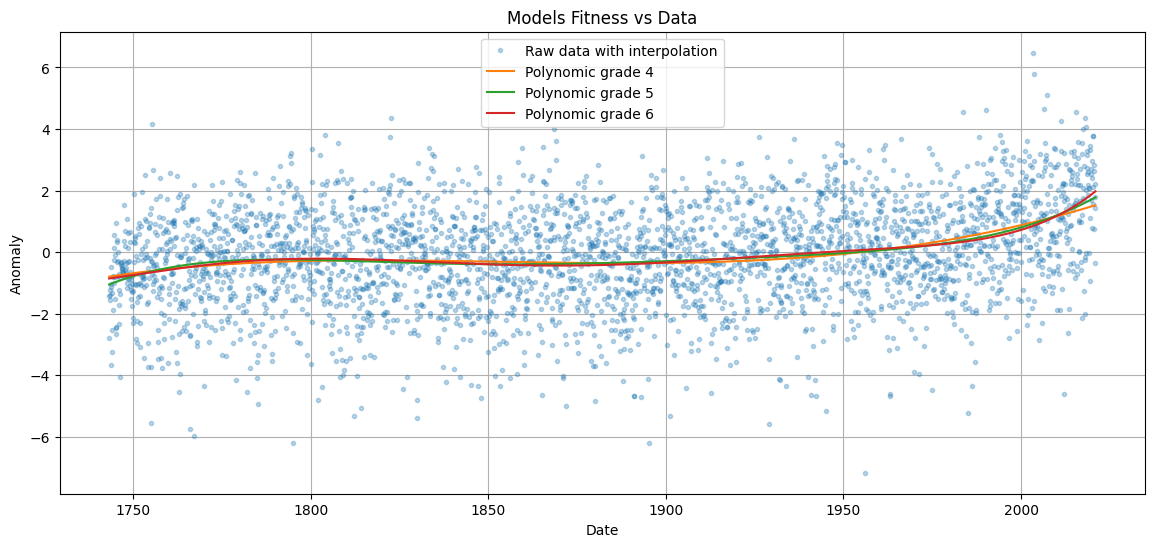

In [58]:
plt.figure(figsize=(14,6))
plt.plot(date, anomaly, '.', alpha=0.3, label='Raw data with interpolation')
plt.plot(date, Polynomial.fit(date, anomaly, 4)(date), label='Polynomic grade 4')
plt.plot(date, Polynomial.fit(date, anomaly, 5)(date), label='Polynomic grade 5')
plt.plot(date, Polynomial.fit(date, anomaly, 6)(date), label='Polynomic grade 6')
plt.xlabel("Date")
plt.ylabel("Anomaly")
plt.title("Models Fitness vs Data")
plt.legend()
plt.grid(True)
plt.show()

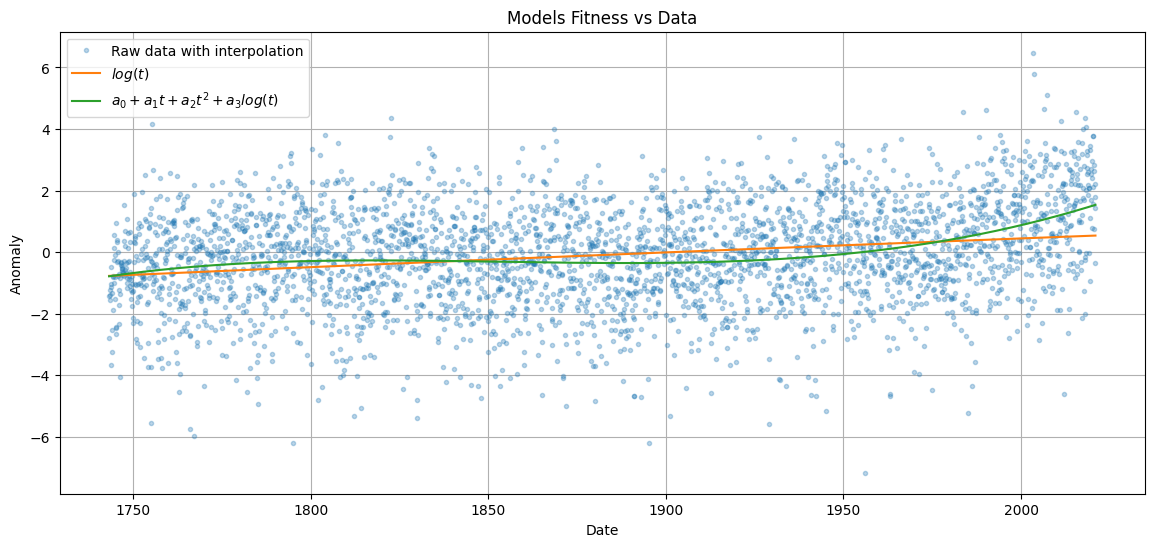

In [59]:
plt.figure(figsize=(14,6))
plt.plot(date, anomaly, '.', alpha=0.3, label='Raw data with interpolation')
plt.plot(date, x_log, label='$log(t)$')
plt.plot(date, x_comb, label='$a_0 + a_1 t + a_2 t^2 + a_3 log(t)$')
plt.xlabel("Date")
plt.ylabel("Anomaly")
plt.title("Models Fitness vs Data")
plt.legend()
plt.grid(True)
plt.show()

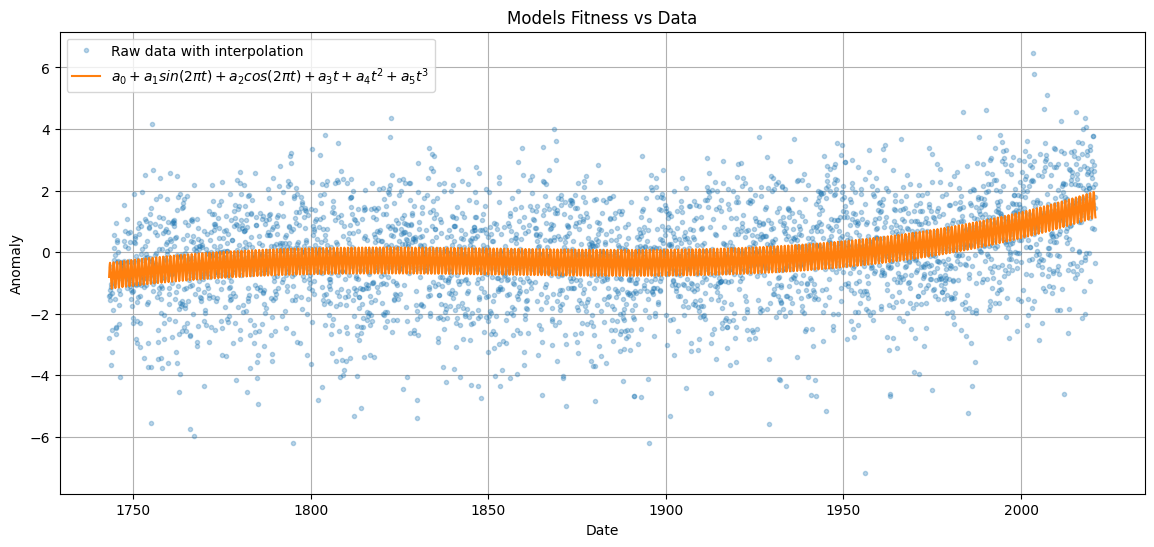

In [60]:
plt.figure(figsize=(14,6))
plt.plot(date, anomaly, '.', alpha=0.3, label='Raw data with interpolation')
plt.plot(date, x_seasonal, label='$a_0 + a_1 sin(2 \pi t) +a_2 cos(2 \pi t) + a_3 t + a_4 t^2 + a_5 t^3$')
plt.xlabel("Date")
plt.ylabel("Anomaly")
plt.title("Models Fitness vs Data")
plt.legend()
plt.grid(True)
plt.show()

In the next step, we will compare the different polynomials fits and the logaritmic and the combination of both, and see who have a mean close to 0 for all times.


In [61]:
y_poly_0 = anomaly - Polynomial.fit(date, anomaly, 0)(date) #The yt for a constant fit of xt
y_poly_1 = anomaly - Polynomial.fit(date, anomaly, 1)(date) #The yt for a linear fit of xt
y_poly_2 = anomaly - Polynomial.fit(date, anomaly, 2)(date) #The yt for a cuadratic fit of xt
y_poly_3 = anomaly - Polynomial.fit(date, anomaly, 3)(date) #The yt for a cubic fit of xt
y_poly_4 = anomaly - Polynomial.fit(date, anomaly, 4)(date) #The yt for a grade 4 fit of xt
y_poly_5 = anomaly - Polynomial.fit(date, anomaly, 5)(date) #The yt for a grade 5 fit of xt
y_poly_6 = anomaly - Polynomial.fit(date, anomaly, 6)(date) #The yt for a grade 6 fit of xt
y_log = anomaly - x_log #The yt for a logaritmic fit of xt
y_comb = anomaly - x_comb #The yt for a combined polinomial of grade 2 and logaritmic fit of xt*
y_seasonal = anomaly - x_seasonal #The yt for a fit of sin and cosine

We will order the previous $y_t$

In [62]:
import pandas as pd

df = pd.DataFrame({
    'date': date,
    'anomaly': anomaly,
    'y_poly_0': y_poly_0,
    'y_poly_1': y_poly_1,
    'y_poly_2': y_poly_2,
    'y_poly_3': y_poly_3,
    'y_poly_4': y_poly_4,
    'y_poly_5': y_poly_5,
    'y_poly_6': y_poly_6,
    'y_log': y_log,
    'y_comb': y_comb,
    'y_seasonal': y_seasonal
})
df.set_index('date', inplace=True)

We will see the graphics of the avarage mobiles. In order to compare with how far are from the 0 we will show a line with the 0.

In [63]:
window = 1200
df['ma_poly0'] = df['y_poly_0'].rolling(window=window, center=True, min_periods=30).mean()
df['ma_poly1'] = df['y_poly_1'].rolling(window=window, center=True, min_periods=30).mean()
df['ma_poly2'] = df['y_poly_2'].rolling(window=window, center=True, min_periods=30).mean()
df['ma_poly3'] = df['y_poly_3'].rolling(window=window, center=True, min_periods=30).mean()
df['ma_poly4'] = df['y_poly_4'].rolling(window=window, center=True, min_periods=30).mean()
df['ma_poly5'] = df['y_poly_5'].rolling(window=window, center=True, min_periods=30).mean()
df['ma_poly6'] = df['y_poly_6'].rolling(window=window, center=True, min_periods=30).mean()
df['ma_log'] = df['y_log'].rolling(window=window, center=True, min_periods=30).mean()
df['ma_comb'] = df['y_comb'].rolling(window=window, center=True, min_periods=30).mean()
df['ma_seasonal'] = df['y_seasonal'].rolling(window=window, center=True, min_periods=30).mean()

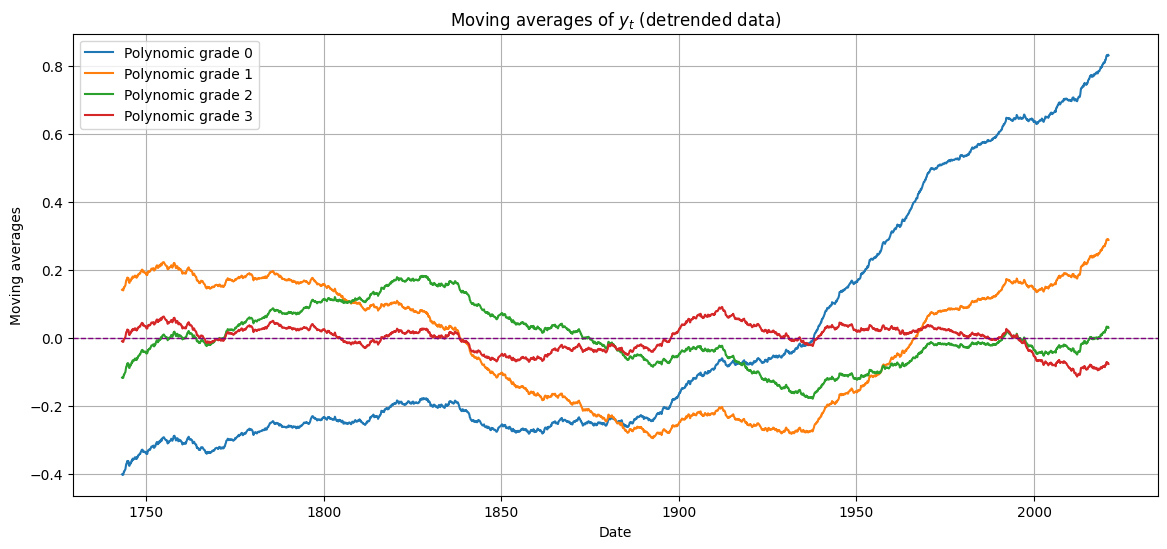

In [64]:
plt.figure(figsize=(14,6))

plt.plot(df.index, df['ma_poly0'], label='Polynomic grade 0')
plt.plot(df.index, df['ma_poly1'], label='Polynomic grade 1')
plt.plot(df.index, df['ma_poly2'], label='Polynomic grade 2')
plt.plot(df.index, df['ma_poly3'], label='Polynomic grade 3')

plt.axhline(0, color='purple', linestyle='--', linewidth=1)
plt.title("Moving averages of $y_t$ (detrended data)")
plt.xlabel("Date")
plt.ylabel("Moving averages")
plt.legend()
plt.grid(True)
plt.show()

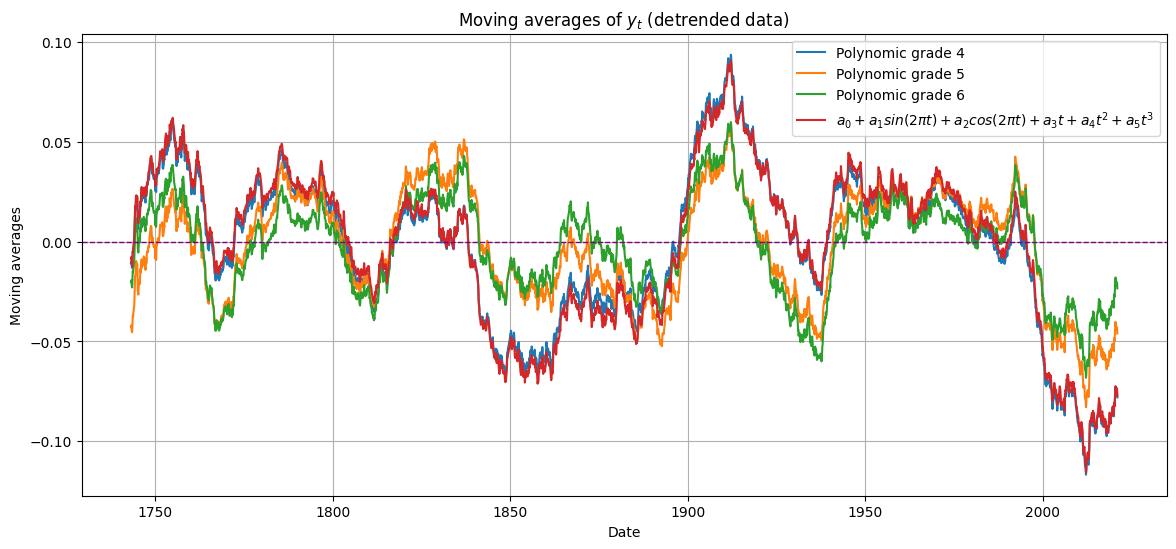

In [65]:
plt.figure(figsize=(14,6))

plt.plot(df.index, df['ma_poly4'], label='Polynomic grade 4')
plt.plot(df.index, df['ma_poly5'], label='Polynomic grade 5')
plt.plot(df.index, df['ma_poly6'], label='Polynomic grade 6')
plt.plot(df.index, df['ma_seasonal'], label='$a_0 + a_1 sin(2 \pi t) +a_2 cos(2 \pi t) + a_3 t + a_4 t^2 + a_5 t^3$')

plt.axhline(0, color='purple', linestyle='--', linewidth=1)
plt.title("Moving averages of $y_t$ (detrended data)")
plt.xlabel("Date")
plt.ylabel("Moving averages")
plt.legend()
plt.grid(True)
plt.show()

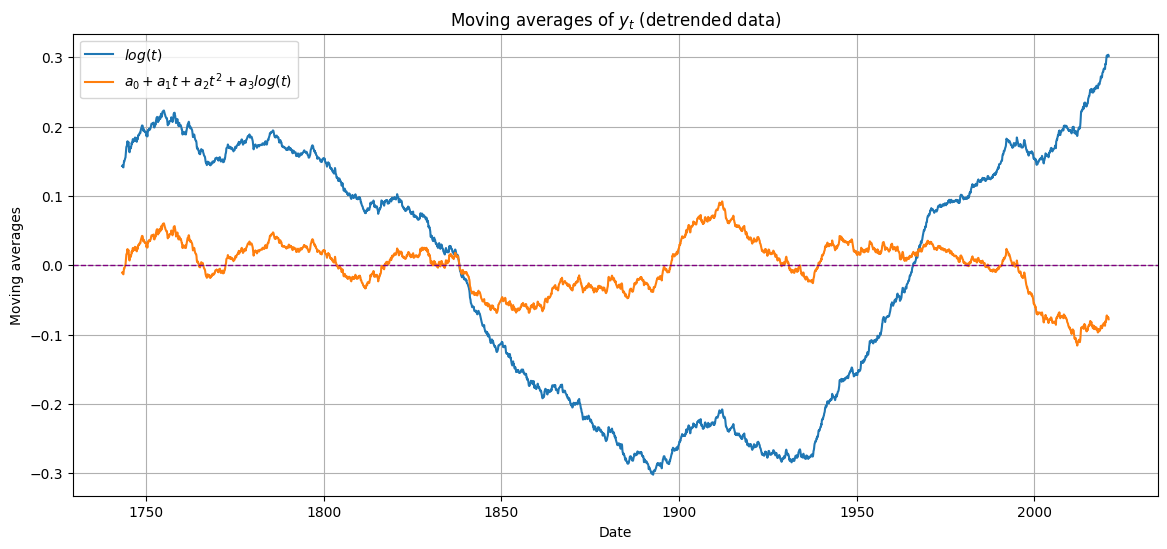

In [66]:
plt.figure(figsize=(14,6))

plt.plot(df.index, df['ma_log'], label='$log(t)$')
plt.plot(df.index, df['ma_comb'], label='$a_0 + a_1 t + a_2 t^2 + a_3 log(t)$')

plt.axhline(0, color='purple', linestyle='--', linewidth=1)
plt.title("Moving averages of $y_t$ (detrended data)")
plt.xlabel("Date")
plt.ylabel("Moving averages")
plt.legend()
plt.grid(True)
plt.show()

We will se the mobile avarage for each fit and we will apply a test of hypotesis to afirm or no if have a mean close to 0 for all times.

In [67]:
from scipy import stats

def test_moving_means(series, window=1200, step=1):
    p_values = []
    all_pass = True
    for i in range(0, len(series) - window, step):
        sub = series.iloc[i:i+window].dropna()
        if len(sub) > 30:
            stat, p = stats.ttest_1samp(sub, popmean=0)
            p_values.append(p)
            if p < 0.01:
                all_pass = False
    return p_values, all_pass

In [68]:
_, passed_poly_0 = test_moving_means(df['y_poly_0'])
_, passed_poly_1 = test_moving_means(df['y_poly_1'])
_, passed_poly_2 = test_moving_means(df['y_poly_2'])
_, passed_poly_3 = test_moving_means(df['y_poly_3'])
_, passed_poly_4 = test_moving_means(df['y_poly_4'])
_, passed_poly_5 = test_moving_means(df['y_poly_5'])
_, passed_poly_6 = test_moving_means(df['y_poly_6'])
_, passed_log = test_moving_means(df['y_log'])
_, passed_comb = test_moving_means(df['y_comb'])
_, passed_seasonal= test_moving_means(df['y_seasonal'])


In [69]:
results = {
    'Model': ['Polynomial grade 0', 'Polynomial grade 1', 'Polynomial grade 2', 'Polynomial grade 3', 'Polynomial grade 4', 'Polynomial grade 5', 'Polynomial grade 6', 'Logaritmic', 'Combination','Seasonal'],
    'Pass the test H0 in all the windows': [passed_poly_0, passed_poly_1,passed_poly_2,passed_poly_3,passed_poly_4,passed_poly_5,passed_poly_6, passed_log, passed_comb, passed_seasonal],
    'MSE': [MSE_errors[0],MSE_errors[1],MSE_errors[2],MSE_errors[3],MSE_errors[4],MSE_errors[5],MSE_errors[6], MSE_errors[7], MSE_errors[8],MSE_errors[9]],
    'R2': [R2_errors[0],R2_errors[1],R2_errors[2],R2_errors[3],R2_errors[4],R2_errors[5],R2_errors[6],R2_errors[7],R2_errors[8],R2_errors[9]]
}
resume = pd.DataFrame(results)
print(resume)

                Model  Pass the test H0 in all the windows       MSE        R2
0  Polynomial grade 0                                False  2.625538  0.000000
1  Polynomial grade 1                                False  2.479496  0.055624
2  Polynomial grade 2                                False  2.431030  0.074083
3  Polynomial grade 3                                 True  2.395449  0.087635
4  Polynomial grade 4                                 True  2.395365  0.087667
5  Polynomial grade 5                                 True  2.389340  0.089962
6  Polynomial grade 6                                 True  2.386351  0.091100
7          Logaritmic                                False  2.482673  0.054414
8         Combination                                 True  2.395356  0.087670
9            Seasonal                                 True  2.305193  0.122011


Now we will choose one of the fitness, in our case the best is the one who pass the condition of have a mean near to 0 in all times.

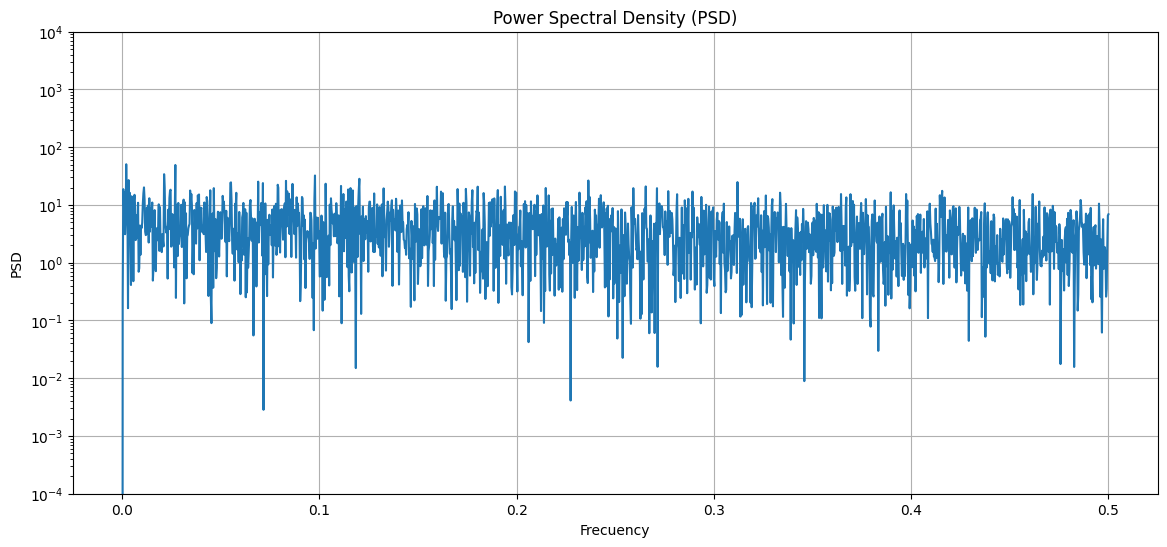

In [70]:
from scipy.signal import periodogram
import matplotlib.pyplot as plt
serie = df['y_seasonal']
frecuencias, potencia = periodogram(serie, scaling='density')  # frecuencia en ciclos por muestra


plt.figure(figsize=(14, 6))
plt.semilogy(frecuencias, potencia)
plt.title("Power Spectral Density (PSD)")
plt.xlabel("Frecuency")
plt.ylabel("PSD")
plt.grid(True)

plt.ylim(10**(-4), 10**4)  # ajustar los límites del eje Y
plt.show()


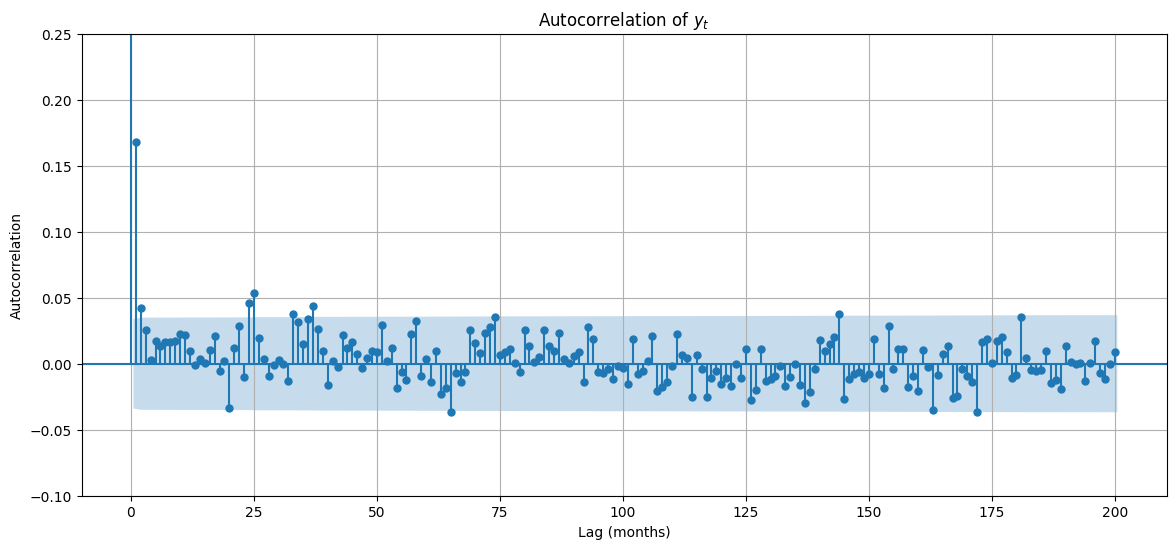

In [71]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(14, 6))
plot_acf(serie, lags=200, ax=ax)
ax.set_title("Autocorrelation of $y_t$")
ax.set_xlabel("Lag (months)")
ax.set_ylabel("Autocorrelation")
ax.grid(True)
# adjust the limits of the Y axe manually
ax.set_ylim(-0.1, 0.25)  # show the most important parts
plt.show()

For simplicity we will use the polynimial of degree 6 for the Ornstein-Uhlenbeck process

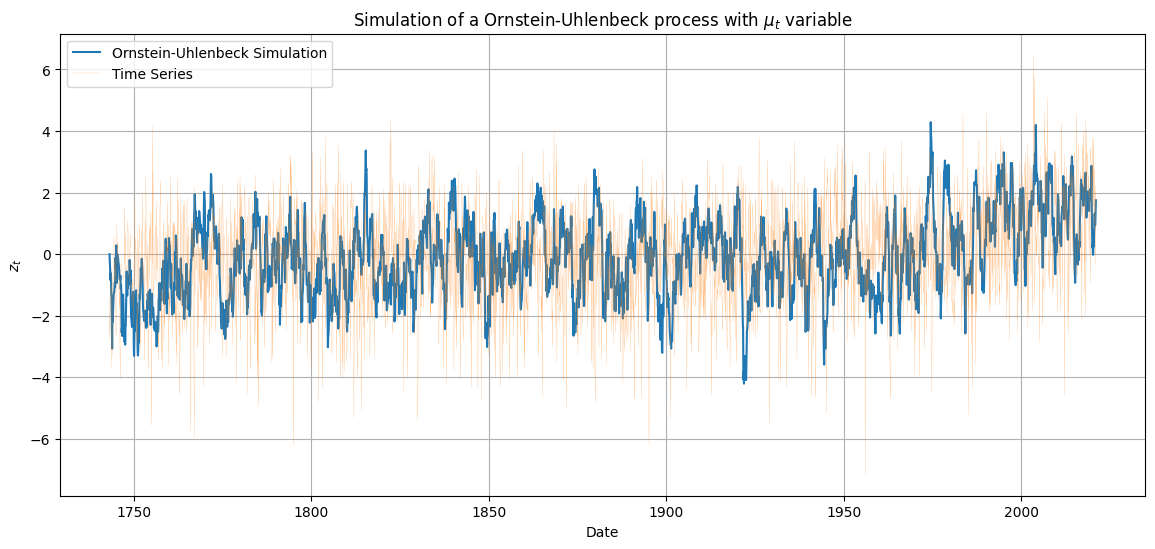

In [72]:
#We already have the date in a list so
dt=1/12
z=np.zeros(len(date))
theta=1
mu = Polynomial.fit(date, anomaly, deg)(date) #As we know mu is the tendence in this case so we will use one of the best model for this
sigma=np.std(anomaly-mu) #As we did in a TD we will use the std for the noise in our case for yt
for i in range(len(date)-1):
  z[i+1] = z[i] - theta*(z[i]-mu[i])*dt + np.sqrt(dt)*sigma*np.random.randn()
# plot
plt.figure(figsize=(14,6))
plt.plot(date, z, label='Ornstein-Uhlenbeck Simulation')
plt.plot(date,anomaly,linewidth=0.1, label='Time Series')
plt.title("Simulation of a Ornstein-Uhlenbeck process with $\mu_t$ variable")
plt.xlabel("Date")
plt.ylabel("$z_t$")
plt.grid(True)
plt.legend()
plt.show()
